In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
5.1.13

In [2]:
x = np.arange(-0.7, 1.9, 0.2)
y = np.array([1.04, 1.0, 0.68, 0.38, 0.07, -0.03, -0.38, -0.22, -0.36, -0.33, -0.28, -0.17, 0.27])
n = 12
m = np.arange(0, 13, 1)

In [3]:
def mnk(x, y, n, m):
    b = np.zeros(m)
    A = np.zeros((m, m))
    for j in range(m):
        b[j] = np.sum(y * (x**j))
        for k in range(m):
            A[j][k] = np.sum(x**(k + j))
    a = np.linalg.solve(A, b)
    return a

def P(a, m, t):
    p = 0
    for j in range(m):
        p += a[j] * (t**j)
    return p

def sigma(x, y, a, n, m):
    d = 0
    for k in range(n):
        d += (P(a, m, x[k]) - y[k])**2
    sigma = np.sqrt(d / (n - m))
    return sigma

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


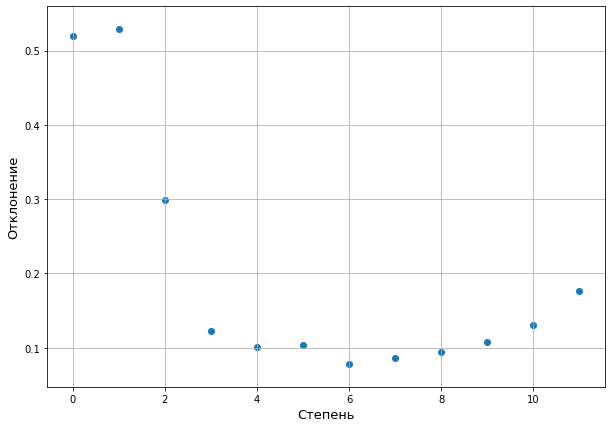

In [4]:
plt.figure(figsize=(10,7))
plt.grid(True)
sigm = []
for mm in m:
    a = mnk(x, y, n, mm)
    sigm.append(sigma(x, y, a, n, mm))
plt.scatter(m, sigm)
plt.xlabel('Степень', size=13)
plt.ylabel('Отклонение', size=13);

In [5]:
m_star = np.argmin(sigm)
print(m_star)

6


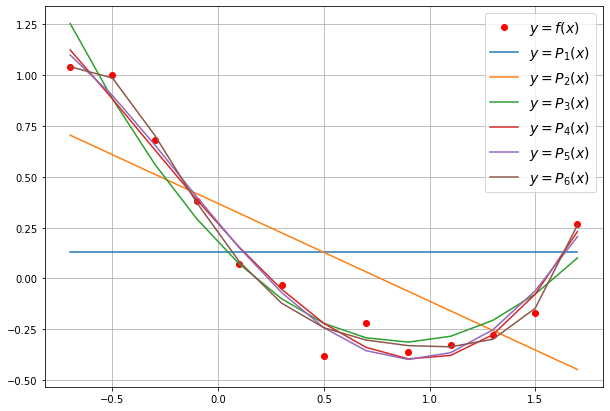

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, 'or', label="$y=f(x)$")
for m in range(1, m_star + 1):
    a = mnk(x, y, x.shape[0], m)
    plt.plot(x, P(a, m, x), label="$y=P_%d(x)$"%(m))
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [7]:
#5.3.6
b_t = np.zeros(m_star)
A_t = np.zeros((m_star, m_star))
for j in range(m_star):
    b_t[j] = np.sum(y * (x ** j))
    for k in range(m_star):
        A_t[j, k] = np.sum(x ** (k + j))

In [8]:
Q, R = np.linalg.qr(A_t)
a_t = np.dot(np.dot(np.linalg.inv(R), Q.T), b_t)
print("a = ", a_t)

a =  [ 0.21778393 -1.44956384  0.93784922  0.764046   -1.28280114  0.47605581]


In [12]:
X = np.array([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])
Y = np.array([0.876, 0.29523, 0.75958,
               1.49184, 2.23671, 2.56000,
               2.23671, 1.49184, 0.75958,
               0.29523, 0.0876], dtype=float)

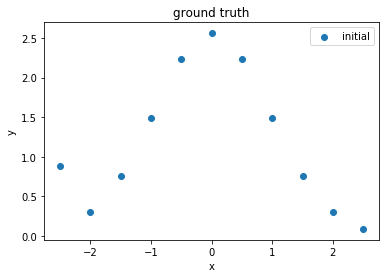

In [13]:
plt.scatter(X, Y, label='initial')
plt.title('ground truth')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

2.299335998706104 -0.2093259175449133


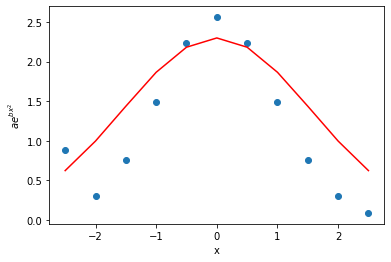

In [15]:
t = np.array([x*x for x in X])
s = np.array([np.log(i) for i in Y]) + t

A = np.hstack([np.ones(len(X)).reshape(-1, 1), X.reshape(-1,1)])
a, b = np.linalg.lstsq(A, s, rcond=None)[0]

print(a, b)
plt.scatter(X, Y)
plt.plot(X, a*np.exp(b*X*X), c = 'r')
plt.xlabel('x')
plt.ylabel('$ae^{bx^{2}}$');